revise: kernel trick

if SVM features vs target are not linearly seperated


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
data = load_breast_cancer()['data']
columns = load_breast_cancer()['feature_names']

df = pd.DataFrame(data,columns=columns)
df['target'] = load_breast_cancer()['target']

In [134]:
# Since we have 30 features, maybe we want just to explore top 3 correlated features with target column

df.corr()[['target']].apply(abs).sort_values('target', ascending = False).drop('target').head(3)

,target
worst concave points,0.793566
worst perimeter,0.782914
mean concave points,0.776614


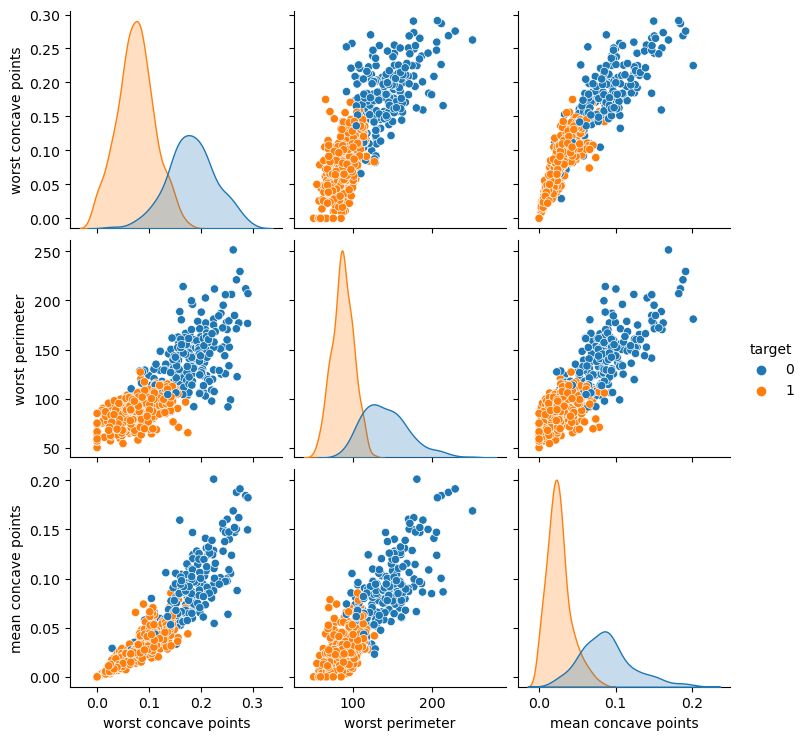

In [140]:
sns.pairplot(df[['worst concave points','worst perimeter','mean concave points','target']], hue = 'target')
plt.show()

In [96]:
X = df.drop('target', axis= 1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = SVC(
    C=1, #controls the cost of misclassification on the trainning data ==> large C ==> low bias, high variance
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
).fit(X_train,y_train)

prediction = model.predict(X_test)
print(classification_report(prediction,y_test))
confusion_matrix(prediction,y_test)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        59
           1       0.97      0.91      0.94       112

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



array([[ 56,   3],
       [ 10, 102]], dtype=int64)

In [114]:
# using GridSearch to determine best model parameters

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid, verbose=3)
grid.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.637 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.625 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.633 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.637 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.625 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

[CV 5/5] END .................C=1000, gamma=0.1;, score=0.633 total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.01;, score=0.637 total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.01;, score=0.613 total time=   0.0s
[CV 4/5] END ................C=1000, gamma=0.01;, score=0.633 total time=   0.0s
[CV 5/5] END ................C=1000, gamma=0.01;, score=0.633 total time=   0.0s
[CV 1/5] END ...............C=1000, gamma=0.001;, score=0.887 total time=   0.0s
[CV 2/5] END ...............C=1000, gamma=0.001;, score=0.912 total time=   0.0s
[CV 3/5] END ...............C=1000, gamma=0.001;, score=0.900 total time=   0.0s
[CV 4/5] END ...............C=1000, gamma=0.001;, score=0.937 total time=   0.0s
[CV 5/5] END ...............C=1000, gamma=0.001;, score=0.924 total time=   0.0s
[CV 1/5] END ..............C=1000, gamma=0.0001;, score=0.938 total time=   0.0s
[CV 2/5] END ..............C

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [115]:
grid.best_params_

{'C': 1, 'gamma': 0.0001}

In [119]:
# initiate the model with best parameter

prediction = grid.predict(X_test)
print(classification_report(prediction,y_test))
confusion_matrix(prediction,y_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        63
           1       0.96      0.94      0.95       108

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



array([[ 59,   4],
       [  7, 101]], dtype=int64)